# Table of Contents

1. Data Sources
2. Questions to answer
3. Data Wrangling: \
    1) Data Assessment \
    2) Data cleansing/Preprocessing (incorrect data types, missing data, and inaccurate data are all the problems that we need to fix before data analysis)
4. Explore data with visualization
5. Conclusion

# Data Sources

The dataset (Fuel Economy Data) is provided by U.S. Environmental Protection Agency, Office of Mobile Sources, National Vehicle and Fuel Emissions Laboratory

##### Using the documentation to understand data

1. Unit measure for engine displacement: Liters
2. Meaning of each feature: 
        Stnd: Vehicle emissions standard code 
        Cyl: Number of Cylinders in the engine 
        Trans: Transmission Type 
        Drv: Drive Axle Type 

# Questions

1. Are more models using alternative sources of fuel (hybrid)? By how much?
2. How much have vehicle classes improved in fuel economy?
3. What are the characteristics of SmartWay vehicles?
4. What features are associated with better fuel economy?
5. For all of the models that were produced in 2008 that were also produced in 2018, how much has the mpg improved and which vehicle improved most?

# Data Assessment

In [93]:
# import the data
import pandas as pd
df_08 = pd.read_csv('./Fuel_Economy_Data/all_alpha_08.csv')
df_18 = pd.read_csv('./Fuel_Economy_Data/all_alpha_18.csv')

In [94]:
df_08.shape, df_18.shape

((2404, 18), (1611, 18))

In [95]:
df_08.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Underhood ID,Veh Class,Air Pollution Score,FE Calc Appr,City MPG,Hwy MPG,Cmb MPG,Unadj Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT03.7PKR,SUV,7,Drv,15,20,17,22.0527,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT03.7PKR,SUV,6,Drv,15,20,17,22.0527,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT02.3DKR,SUV,7,Drv,17,22,19,24.1745,5,no
3,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT02.3DKR,SUV,6,Drv,17,22,19,24.1745,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXV03.5HKR,midsize car,7,Drv,16,24,19,24.5629,5,no


In [96]:
df_18.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
1,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
2,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,19,27,22,4,No,402
3,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,19,27,22,4,No,402
4,ACURA TLX,2.4,4.0,AMS-8,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,JHNXV02.4WH3,small car,3,23,33,27,6,No,330


The codes below are used to better know the dataset on the duplications, null values, data structure, data types, and unique values

# Dataset 2008

In [97]:
# total number of the rows that have duplicates
df_08.duplicated().sum()

25

In [98]:
# total number of null value for each column
df_08.isnull().sum()

Model                     0
Displ                     0
Cyl                     199
Trans                   199
Drive                    93
Fuel                      0
Sales Area                0
Stnd                      0
Underhood ID              0
Veh Class                 0
Air Pollution Score       0
FE Calc Appr            199
City MPG                199
Hwy MPG                 199
Cmb MPG                 199
Unadj Cmb MPG           199
Greenhouse Gas Score    199
SmartWay                  0
dtype: int64

In [99]:
# data type of dataset 2008
df_08.dtypes

Model                    object
Displ                   float64
Cyl                      object
Trans                    object
Drive                    object
Fuel                     object
Sales Area               object
Stnd                     object
Underhood ID             object
Veh Class                object
Air Pollution Score      object
FE Calc Appr             object
City MPG                 object
Hwy MPG                  object
Cmb MPG                  object
Unadj Cmb MPG           float64
Greenhouse Gas Score     object
SmartWay                 object
dtype: object

In [100]:
# number of unique value for each column
df_08.nunique()

Model                   436
Displ                    47
Cyl                       8
Trans                    14
Drive                     2
Fuel                      5
Sales Area                3
Stnd                     12
Underhood ID            343
Veh Class                 9
Air Pollution Score      13
FE Calc Appr              2
City MPG                 39
Hwy MPG                  43
Cmb MPG                  38
Unadj Cmb MPG           721
Greenhouse Gas Score     20
SmartWay                  2
dtype: int64

# Dataset 2018

In [101]:
# number of the rows that have duplicates
df_18.duplicated().sum()

0

In [102]:
# number of null value for each column
df_18.isnull().sum()

Model                   0
Displ                   2
Cyl                     2
Trans                   0
Drive                   0
Fuel                    0
Cert Region             0
Stnd                    0
Stnd Description        0
Underhood ID            0
Veh Class               0
Air Pollution Score     0
City MPG                0
Hwy MPG                 0
Cmb MPG                 0
Greenhouse Gas Score    0
SmartWay                0
Comb CO2                0
dtype: int64

In [103]:
# data type of dataset 2018
df_18.dtypes

Model                    object
Displ                   float64
Cyl                     float64
Trans                    object
Drive                    object
Fuel                     object
Cert Region              object
Stnd                     object
Stnd Description         object
Underhood ID             object
Veh Class                object
Air Pollution Score       int64
City MPG                 object
Hwy MPG                  object
Cmb MPG                  object
Greenhouse Gas Score      int64
SmartWay                 object
Comb CO2                 object
dtype: object

In [104]:
# number of unique value for each column
df_18.nunique()

Model                   367
Displ                    36
Cyl                       7
Trans                    26
Drive                     2
Fuel                      5
Cert Region               2
Stnd                     19
Stnd Description         19
Underhood ID            230
Veh Class                 9
Air Pollution Score       6
City MPG                 58
Hwy MPG                  62
Cmb MPG                  57
Greenhouse Gas Score     10
SmartWay                  3
Comb CO2                299
dtype: int64

# Data Cleansing

In [105]:
# view dataset 2008
df_08.columns

Index(['Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Sales Area', 'Stnd',
       'Underhood ID', 'Veh Class', 'Air Pollution Score', 'FE Calc Appr',
       'City MPG', 'Hwy MPG', 'Cmb MPG', 'Unadj Cmb MPG',
       'Greenhouse Gas Score', 'SmartWay'],
      dtype='object')

In [106]:
# view dataset 2018
df_18.columns

Index(['Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Cert Region',
       'Stnd', 'Stnd Description', 'Underhood ID', 'Veh Class',
       'Air Pollution Score', 'City MPG', 'Hwy MPG', 'Cmb MPG',
       'Greenhouse Gas Score', 'SmartWay', 'Comb CO2'],
      dtype='object')

## 1. Drop Extraneous Columns

Drop the features that are not consistent (not present in both datasets) or are not relevant to our questions.
Apply Pandas drop function to do this

In [107]:
# drop extraneous columns from dataset 2008
df_08.drop(columns=['Stnd','Underhood ID','FE Calc Appr','Unadj Cmb MPG'],inplace=True)

# confirm changes
df_08.head(1)

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no


In [108]:
# drop extraneous columns from dataset 2018
df_18.drop(columns=['Stnd','Stnd Description','Underhood ID','Comb CO2'], inplace=True)

# confirm changes
df_18.head(1)

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,small SUV,3,20,28,23,5,No


## 2. Rename Columns

Changed the "Cert Region" column label in the 2018 dataset to "Sales Area" for consistency. Rename all column labels to replace spaces with underscores and convert everything to lowercase. (Underscores can be much easier to work with in Python than spaces. For example, having spaces does not allow you to use df.column_name instead of df['column_name'] to select columns or use query(). Being consistent with lowercase and underscores also helps make column names easy to remember.

In [109]:
# Rename Sales Area to Cert Region for dataset 2008
df_08.rename(columns={"Sales Area":"Cert Region"},inplace=True)

# confirm changes
df_08.head(1)

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no


In [110]:
# Replace spaces with underscores and lowercase labels for dataset 2008
df_08.rename(columns=lambda x: x.strip().lower().replace(" ","_"), inplace=True)

# confirm changes
df_08.head(1)

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no


In [111]:
# Replace spaces with underscores and lowercase labels for dataset 2018
df_18.rename(columns=lambda x: x.strip().lower().replace(" ","_"), inplace=True)

# confirm changes
df_18.head(1)

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,small SUV,3,20,28,23,5,No


In [112]:
# Confirm the labels for dataset 2008 and dataset 2018 are identical
df_08.columns == df_18.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [144]:
# Save them as the new dataset
df_08.to_csv('./Fuel_Economy_Data/data_08_v1.csv', index=False)
df_18.to_csv('./Fuel_Economy_Data/data_18_v1.csv', index=False)

### 3. Filter

For consistency, we only compare the cars that were certified by California standards. Filter both of the datasets to select the rows which 'sale_area' are 'CA' by using query. After that, drop the 'sale_area' column for both of the datasets since we know 'sale_area' for all of the rows are 'CA'.

In [115]:
# filter datasets for each row by following the California standards
df_08 = df_08.query('cert_region == "CA"')
df_18 = df_18.query('cert_region == "CA"')

In [120]:
# Confirm that the cert_region of all the columns are 'CA'
df_08['cert_region'].unique(), df_18['cert_region'].unique()

(array(['CA'], dtype=object), array(['CA'], dtype=object))

In [121]:
# Drop cert_region column from both datasets since we know all of their cert_region are 'CA'
df_08.drop(['cert_region'], axis=1, inplace=True)
df_08.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,SUV,7,15,20,17,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,SUV,7,17,22,19,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,midsize car,7,16,24,19,5,no
6,ACURA TL,3.2,(6 cyl),Auto-S5,2WD,Gasoline,midsize car,7,18,26,21,6,yes
7,ACURA TL,3.5,(6 cyl),Auto-S5,2WD,Gasoline,midsize car,7,17,26,20,6,yes


In [122]:
df_18.drop(['cert_region'], axis=1, inplace=True)
df_18.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,small SUV,3,20,28,23,5,No
3,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,small SUV,3,19,27,22,4,No
4,ACURA TLX,2.4,4.0,AMS-8,2WD,Gasoline,small car,3,23,33,27,6,No
6,ACURA TLX,3.5,6.0,SemiAuto-9,2WD,Gasoline,small car,3,20,32,24,5,No
8,ACURA TLX,3.5,6.0,SemiAuto-9,4WD,Gasoline,small car,3,21,30,24,5,No


## 4. Drop Null value

Drop the rows from both datasets as long as they contain 'Null' value

In [123]:
df_08.dropna(inplace=True) # here must have inplace = True
df_18.dropna(inplace=True)

In [136]:
# Check if any column contained Null values. Print the number of column that contains Null values.
df_08.isnull().any(axis=0).sum(), df_18.isnull().any(axis=0).sum()

(0, 0)

## 5. Drop duplicates

In [137]:
df_08.drop_duplicates(inplace=True) # here must have inplace = True
df_18.drop_duplicates(inplace=True) 

In [138]:
df_08.duplicated().sum(), df_18.duplicated().sum()

(0, 0)

In [145]:
# Save them as the new dataset
df_08.to_csv('./Fuel_Economy_Data/data_08_v2.csv', index=False)
df_18.to_csv('./Fuel_Economy_Data/data_18_v2.csv', index=False)

## 6. Fix data types

### 6.1 Fix cycl datatype
##### cyl datatype 2008: extract int from string
##### cyl datatype 2018: convert float into int

In [268]:
df_08 = pd.read_csv('./Fuel_Economy_Data/data_08_v2.csv')
df_18 = pd.read_csv('./Fuel_Economy_Data/data_18_v2.csv')

In [269]:
# check value counts 
df_08['cyl'].value_counts()

(6 cyl)     409
(4 cyl)     283
(8 cyl)     199
(5 cyl)      48
(12 cyl)     30
(10 cyl)     14
(2 cyl)       2
(16 cyl)      1
Name: cyl, dtype: int64

In [270]:
# Extract int from strings for dataset 2008
import numpy as np
df_08['cyl'] = df_08['cyl'].str.extract('(\d+)').astype(np.int64)
df_08['cyl'].value_counts()

6     409
4     283
8     199
5      48
12     30
10     14
2       2
16      1
Name: cyl, dtype: int64

In [271]:
# check value counts 
df_18['cyl'].value_counts()

4.0     365
6.0     246
8.0     153
3.0      18
12.0      9
5.0       2
16.0      1
Name: cyl, dtype: int64

In [273]:
# Convert float into int for dataset 2018
df_18['cyl'] = df_18['cyl'].astype(int)
df_18['cyl'].value_counts()

4     365
6     246
8     153
3      18
12      9
5       2
16      1
Name: cyl, dtype: int64

In [274]:
df_08.to_csv('./Fuel_Economy_Data/data_08_v3.csv', index=False)
df_18.to_csv('./Fuel_Economy_Data/data_18_v3.csv', index=False)

### 6.2 Fix air_pollution_score datatype

In [313]:
df_08 = pd.read_csv('./Fuel_Economy_Data/data_08_v3.csv')
df_18 = pd.read_csv('./Fuel_Economy_Data/data_18_v3.csv')

In [314]:
df_08['air_pollution_score'].dtypes

dtype('O')

In [315]:
df_08.iloc[582] # note some fraction formed string would be hard to convert to float directly

model                   MERCEDES-BENZ C300
displ                                    3
cyl                                      6
trans                              Auto-L7
drive                                  2WD
fuel                           ethanol/gas
veh_class                        small car
air_pollution_score                    6/4
city_mpg                             13/18
hwy_mpg                              19/25
cmb_mpg                              15/21
greenhouse_gas_score                   7/6
smartway                                no
Name: 582, dtype: object

According to the documentation: "If a vehicle can operate on more than one type pf fuel, an estimate is provided for each fuel type." \
So the vehicles with more than one fuel type, or hybrids, like the one above (ethanol/gas) will have a string that holds two values - one for each.

In [316]:
# Get all the hybrid columns in dataset 2008
hybrid_08 = df_08[df_08['fuel'].str.contains('/')]
hybrid_08

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


In [317]:
# Get all the hybrid columns in dataset 2018
hybrid_18 = df_18[df_18['fuel'].str.contains('/')]
hybrid_18

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
52,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,3,28/66,34/78,30/71,10,Yes
78,BMW 530e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,7,27/70,31/75,29/72,10,Elite
79,BMW 530e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,small car,7,27/66,31/68,28/67,10,Elite
92,BMW 740e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,large car,3,25/62,29/68,27/64,9,Yes
189,CHEVROLET Impala,3.6,6,SemiAuto-6,2WD,Ethanol/Gas,large car,5,14/18,20/28,16/22,4,No
195,CHEVROLET Silverado 15,4.3,6,Auto-6,2WD,Ethanol/Gas,pickup,5,12/18,16/24,14/20,4,No
196,CHEVROLET Silverado 15,4.3,6,Auto-6,4WD,Ethanol/Gas,pickup,5,12/17,15/22,13/19,3,No
197,CHEVROLET Silverado 15,5.3,8,Auto-6,2WD,Ethanol/Gas,pickup,3,12/16,17/23,14/19,3,No
212,CHEVROLET Suburban 1500,5.3,8,Auto-6,2WD,Ethanol/Gas,standard SUV,3,12/16,17/23,14/19,3,No
214,CHEVROLET Suburban 1500,5.3,8,Auto-6,4WD,Ethanol/Gas,standard SUV,3,11/16,15/22,12/18,3,No


Take split each hybrid row into two new rows, one with values for the first fuel type (values before '/')and the other with values for the second fuel type (values after '/')

In [318]:
# create two copies of the 2008 hybrid dataframes
df1 = hybrid_08.copy() # first fuel type data of each hybrid vehicle
df2 = hybrid_08.copy() # second fuel type data of each hybrid vehicle

In [319]:
df1

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,small car,6/4,13/18,19/25,15/21,7/6,no


In [320]:
# columns to be splitted by '/'
split_columns = ['fuel', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg', 'greenhouse_gas_score']

# apply split function to each colunmn 
for i in split_columns:
    df1[i] = df1[i].apply(lambda x: x.split('/')[0])
    df2[i] = df2[i].apply(lambda x: x.split('/')[1])    

In [321]:
df1

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6,13,19,15,7,no


In [322]:
df2

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,4,18,25,21,6,no


In [323]:
# Combine df1 and df2 
new_rows = df1.append(df2)
new_rows

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,small car,6,13,19,15,7,no
582,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,small car,4,18,25,21,6,no


In [324]:
# drop the original hybrid rows
df_08.drop(hybrid_08.index, inplace=True)

# add in our new separated rows
df_08 = df_08.append(new_rows, ignore_index=True)

In [325]:
# check that all the original hybrid rows with '/' are dropped
df_08[df_08['fuel'].str.contains('/')]

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway


In [326]:
df_08.shape

(987, 13)

#### Repeat the process for dataset 2018

In [327]:
# create two copies of the 2018 hybrid dataframes
df1 = hybrid_18.copy() # first fuel type data of each hybrid vehicle
df2 = hybrid_18.copy() # second fuel type data of each hybrid vehicle

In [328]:
#df1

In [329]:
# columns to be splitted by '/'
split_columns = ['fuel', 'city_mpg', 'hwy_mpg', 'cmb_mpg']

# apply split function to each colunmn 
for i in split_columns:
    df1[i] = df1[i].apply(lambda x: x.split('/')[0])
    df2[i] = df2[i].apply(lambda x: x.split('/')[1])  

In [330]:
#df1

In [331]:
#df2

In [332]:
# Combine df1 and df2 
new_rows = df1.append(df2)
#new_rows

In [333]:
# drop the original hybrid rows
df_18.drop(hybrid_18.index, inplace=True)

# add in our new separated rows
df_18 = df_18.append(new_rows, ignore_index=True)

In [334]:
# Check that all the orginal hybrid rows with '/' are dropped
df_18[df_18['fuel'].str.contains('/')]

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway


In [335]:
df_18.shape

(832, 13)

Now change string to float

In [339]:
# Convert string to float for 2008 air pollution column
df_08['air_pollution_score'] = df_08['air_pollution_score'].apply(pd.to_numeric)

# Convert int to float for 2018 air pollution column
df_18['air_pollution_score'] = df_18['air_pollution_score'].astype(float)

In [340]:
df_08['air_pollution_score'].dtypes

dtype('float64')

In [342]:
df_08.to_csv('data_08_v4.csv', index=False)
df_18.to_csv('data_18_v4.csv', index=False)

### 6.3 Fix city_mpg, hwy_mpg, cmb_mpg datatypes

In [344]:
df_08 = pd.read_csv('./Fuel_Economy_Data/data_08_v4.csv')
df_18 = pd.read_csv('./Fuel_Economy_Data/data_18_v4.csv')
df_08.dtypes

model                    object
displ                   float64
cyl                       int64
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score     float64
city_mpg                  int64
hwy_mpg                   int64
cmb_mpg                   int64
greenhouse_gas_score      int64
smartway                 object
dtype: object

In [345]:
# Convert mpg columns to floats
mpg_columns = ['city_mpg','hwy_mpg','cmb_mpg']
for i in mpg_columns:
    df_08[i] = df_08[i].astype(float)
    df_18[i] = df_18[i].astype(float)

In [346]:
df_08.dtypes

model                    object
displ                   float64
cyl                       int64
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score     float64
city_mpg                float64
hwy_mpg                 float64
cmb_mpg                 float64
greenhouse_gas_score      int64
smartway                 object
dtype: object

In [347]:
df_18.dtypes

model                    object
displ                   float64
cyl                       int64
trans                    object
drive                    object
fuel                     object
veh_class                object
air_pollution_score     float64
city_mpg                float64
hwy_mpg                 float64
cmb_mpg                 float64
greenhouse_gas_score      int64
smartway                 object
dtype: object

### 6.4 Fix greenhouse_gas_score datatype

Make sure that the datatypes of both 2008 and 2018 are identical.

In [348]:
df_08.dtypes == df_18.dtypes

model                   True
displ                   True
cyl                     True
trans                   True
drive                   True
fuel                    True
veh_class               True
air_pollution_score     True
city_mpg                True
hwy_mpg                 True
cmb_mpg                 True
greenhouse_gas_score    True
smartway                True
dtype: bool

In [349]:
# Save the final clean datasets as new files
df_08.to_csv('./Fuel_Economy_Data/clean_08.csv', index=False)
df_18.to_csv('./Fuel_Economy_Data/clean_18.csv', index=False)

## 7. Explore data with visualizations


In [350]:
import matplotlib.pyplot as plt
import pandas as pd
df_08 = pd.read_csv('./Fuel_Economy_Data/clean_08.csv')
df_18 = pd.read_csv('./Fuel_Economy_Data/clean_18.csv')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x119738910>,
      dtype=object)

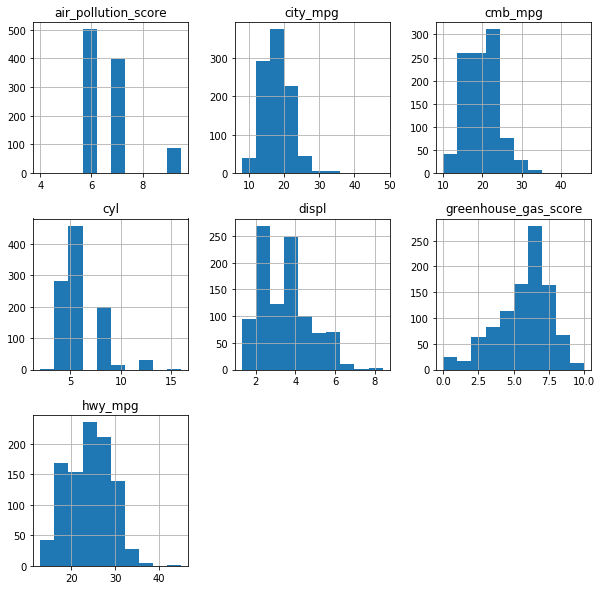

In [353]:
df_08.hist(figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x119738490>,
      dtype=object)

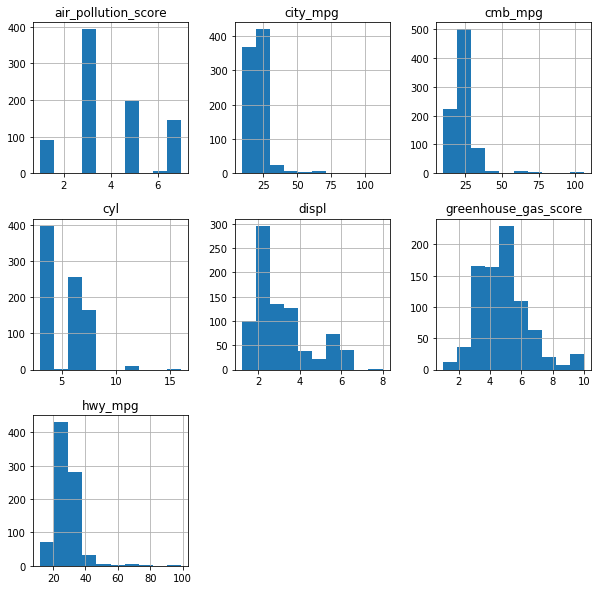

In [354]:
df_18.hist(figsize=(10,10))

According to the plots above, we can see that, from 2008 to 2018, the distribution of combined_mpg (cmb_mpg) becomes more screwed to the right.

We also can see that, from 2008 to 2018, the distribution of greenhouse_gas_score turns out to be more screwed to the left.

Text(0.5, 1.0, 'Relationship between Engine Size (displ) and Combined Mpg (cmb_mpg) in 2008')

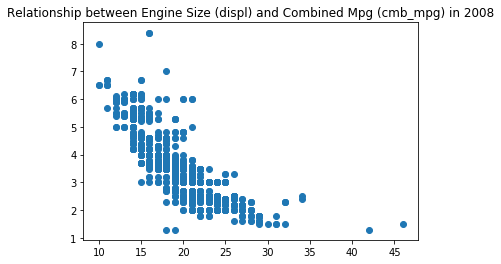

In [360]:
plt.scatter(data=df_08, x='cmb_mpg', y='displ');
plt.title('Relationship between Engine Size (displ) and Combined Mpg (cmb_mpg) in 2008')

Text(0.5, 1.0, 'Relationship between Engine Size (displ) and Combined Mpg (cmb_mpg) in 2018')

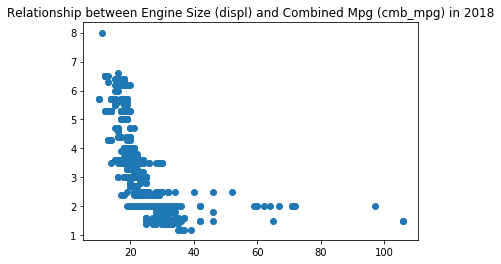

In [361]:
plt.scatter(data=df_18, x='cmb_mpg', y='displ');
plt.title('Relationship between Engine Size (displ) and Combined Mpg (cmb_mpg) in 2018')

According to the figures above, we can see that, for both dataset 2008 and dataset 2018, there is a negative corelation between the displacement and the combined mpg.

Text(0.5, 1.0, 'Relationship between Combined Mpg (cmb_mpg) and Greenhouse Gas Score in 2008')

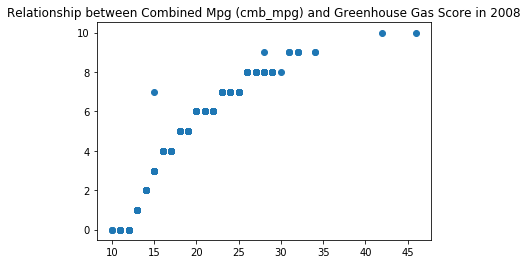

In [364]:
plt.scatter(data=df_08, x='cmb_mpg', y='greenhouse_gas_score');
plt.title('Relationship between Combined Mpg (cmb_mpg) and Greenhouse Gas Score in 2008')

Text(0.5, 1.0, 'Relationship between Combined Mpg (cmb_mpg) and Greenhouse Gas Score in 2018')

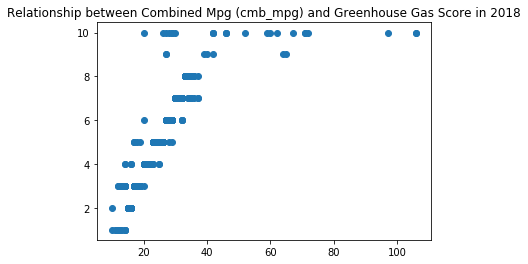

In [365]:
plt.scatter(data=df_18, x='cmb_mpg', y='greenhouse_gas_score');
plt.title('Relationship between Combined Mpg (cmb_mpg) and Greenhouse Gas Score in 2018')

Obviously, we can see that, for both dataset 2008 and dataset 2018, there is a strong positive corelation between the the combined mpg and the greenhouse gas score.

## 8. Conclusions and Visualizations

5 questions to be answered.

Q1. Are more models using alternative sources of fuel? By how much? \
Q2. How much have vehicle classes improved in fuel economy? \
Q3. What are the characteristics of SmartWay vehicles? \
Q4. What features are associated with better fuel economy? \
Q5. For all of the models that were produced in 2008 that were also produced in 2018, how much has the mpg improved and which vehicle improved most?

In [367]:
df_08 = pd.read_csv('./Fuel_Economy_Data/clean_08.csv')
df_18 = pd.read_csv('./Fuel_Economy_Data/clean_18.csv')

In [368]:
df_08.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,SUV,7.0,15.0,20.0,17.0,4,no
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,19.0,5,no
2,ACURA RL,3.5,6,Auto-S5,4WD,Gasoline,midsize car,7.0,16.0,24.0,19.0,5,no
3,ACURA TL,3.2,6,Auto-S5,2WD,Gasoline,midsize car,7.0,18.0,26.0,21.0,6,yes
4,ACURA TL,3.5,6,Auto-S5,2WD,Gasoline,midsize car,7.0,17.0,26.0,20.0,6,yes


In [369]:
df_18.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,3.5,6,SemiAuto-6,2WD,Gasoline,small SUV,3.0,20.0,28.0,23.0,5,No
1,ACURA RDX,3.5,6,SemiAuto-6,4WD,Gasoline,small SUV,3.0,19.0,27.0,22.0,4,No
2,ACURA TLX,2.4,4,AMS-8,2WD,Gasoline,small car,3.0,23.0,33.0,27.0,6,No
3,ACURA TLX,3.5,6,SemiAuto-9,2WD,Gasoline,small car,3.0,20.0,32.0,24.0,5,No
4,ACURA TLX,3.5,6,SemiAuto-9,4WD,Gasoline,small car,3.0,21.0,30.0,24.0,5,No


### Q1. Are more unique models using alternative sources of fuel (hybrid)? By how much?

In [388]:
# CNG (Compressed Natural Gas), Ethanol, and Electricity are alternative sources.
df_08['fuel'].value_counts()

Gasoline    984
CNG           1
ethanol       1
gas           1
Name: fuel, dtype: int64

In [389]:
df_18['fuel'].value_counts()

Gasoline       749
Gas             26
Ethanol         26
Diesel          19
Electricity     12
Name: fuel, dtype: int64

The available alternative sources of fuel in 2008 are CNG and ethanol. \
The available alternative sources of fuel in 2018 are ethanol and electricity.

In [401]:
# unique models that used alternative sources of fuel in 2008 and 2018
alter_08 = df_08.query('fuel in ["CNG", "ethanol"]').model.nunique()
alter_18 = df_18.query('fuel in ["Electricity", "Ethanol"]').model.nunique()

Text(0, 0.5, 'Number of Unique Models')

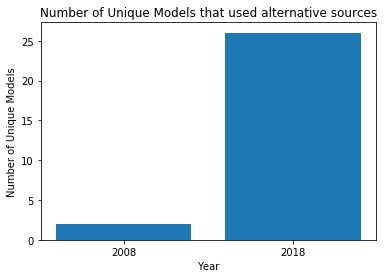

In [402]:
plt.bar(['2008','2018'],[alter_08,alter_18])
plt.title('Number of Unique Models that used alternative sources')
plt.xlabel('Year')
plt.ylabel('Number of Unique Models')

In [405]:
alter_08, alter_18

(2, 26)

More unique models used alternative sources of fuel in 2018 than in 2008.

In [406]:
# Total unique models each year
total_08 = df_08.model.nunique()
total_18 = df_18.model.nunique()
total_08, total_18

(377, 357)

In [407]:
prop_08 = alter_08/total_08
prop_18 = alter_18/total_18
prop_08, prop_18

(0.005305039787798408, 0.07282913165266107)

Text(0, 0.5, 'Proportion of Unique Models')

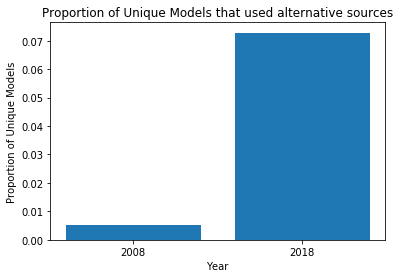

In [408]:
plt.bar(['2008','2018'],[prop_08,prop_18])
plt.title('Proportion of Unique Models that used alternative sources')
plt.xlabel('Year')
plt.ylabel('Proportion of Unique Models')

Thus, more unique models used alternative sources of fuel in 2018 than in 2008, increased by 6.75%

### Q2. How much have vehicle classes improved in fuel economy?

Let's look at the average fuel economy for each vehicle class for both years

In [411]:
veh_08 = df_08.groupby('veh_class').cmb_mpg.mean()
veh_08

veh_class
SUV              18.471429
large car        18.509091
midsize car      21.601449
minivan          19.117647
pickup           16.277108
small car        21.105105
station wagon    22.366667
van              14.952381
Name: cmb_mpg, dtype: float64

In [412]:
veh_18 = df_18.groupby('veh_class').cmb_mpg.mean()
veh_18

veh_class
large car          23.409091
midsize car        27.884058
minivan            20.800000
pickup             18.589744
small SUV          24.074074
small car          25.421053
special purpose    18.500000
standard SUV       18.197674
station wagon      27.529412
Name: cmb_mpg, dtype: float64

In [413]:
# How much have been increased for each vehicle class
incre = veh_18 - veh_08
incre

veh_class
SUV                     NaN
large car          4.900000
midsize car        6.282609
minivan            1.682353
pickup             2.312635
small SUV               NaN
small car          4.315948
special purpose         NaN
standard SUV            NaN
station wagon      5.162745
van                     NaN
Name: cmb_mpg, dtype: float64

In [414]:
# Only plot the classes that exist in both years
incre.dropna(inplace=True)
incre

veh_class
large car        4.900000
midsize car      6.282609
minivan          1.682353
pickup           2.312635
small car        4.315948
station wagon    5.162745
Name: cmb_mpg, dtype: float64

Text(0, 0.5, 'Increase in Average Combined MPG')

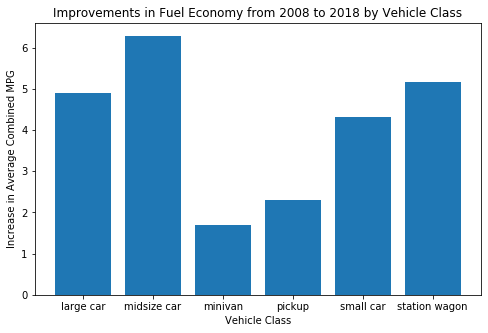

In [415]:
plt.subplots(figsize=(8,5))
plt.bar(incre.index,incre)
plt.title('Improvements in Fuel Economy from 2008 to 2018 by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Increase in Average Combined MPG')

### Q3. What are the characteristics of SmartWay vehicles? Have they changed over time?

Analyze this by filtering each dataframe by SmartWay classification and exploring these datasets

In [416]:
# SmartWay labels for 2008
df_08.smartway.unique()

array(['no', 'yes'], dtype=object)

In [423]:
# Get all SmartWay vehicles in 2008
smart_08 = df_08.query('smartway == "yes"')

In [424]:
# Explore SmartWay vehicles in 2008
smart_08.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,2.602895,4.826316,7.365789,20.984211,28.413158,23.736842,6.868421
std,0.623436,1.002025,1.148195,3.442672,3.075194,3.060379,0.827338
min,1.300000,4.000000,6.000000,17.000000,22.000000,20.000000,6.000000
25%,2.275000,4.000000,7.000000,19.000000,26.000000,22.000000,6.000000
50%,2.400000,4.000000,7.000000,20.000000,28.000000,23.000000,7.000000
75%,3.000000,6.000000,7.000000,22.000000,30.000000,25.000000,7.000000
max,5.000000,8.000000,9.500000,48.000000,45.000000,46.000000,10.000000


In [425]:
# SmartWay labels for 2018
df_18.smartway.unique()

array(['No', 'Yes', 'Elite'], dtype=object)

In [428]:
# Get all SmartWay vehicles in 2018
smart_18 = df_18.query('smartway in ["Yes","Elite"]')

In [429]:
# Explore SmartWay vehicles in 2018
smart_18.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,1.787963,3.935185,5.212963,34.907407,41.472222,37.361111,7.925926
std,0.408031,0.416329,1.798498,16.431982,13.095236,14.848429,1.197378
min,1.200000,3.000000,3.000000,25.000000,27.000000,26.000000,7.000000
25%,1.500000,4.000000,3.000000,28.000000,36.000000,31.000000,7.000000
50%,1.700000,4.000000,5.500000,28.500000,37.000000,32.000000,7.000000
75%,2.000000,4.000000,7.000000,31.250000,40.250000,35.000000,9.000000
max,3.500000,6.000000,7.000000,113.000000,99.000000,106.000000,10.000000


### Q4. What features are associated with better fuel economy? 

Explore the trends between cmb_mpg and the other features in this dataset \
Select all the vehicles that have the top 50% fuel economy ratings to see the characteristics

In [431]:
top_08 = df_08.query('cmb_mpg > cmb_mpg.mean()')
top_08.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000
mean,2.667823,4.890173,6.998073,20.317919,27.603083,22.992293,6.639692
std,0.665551,1.034856,1.159565,3.198257,3.051120,2.926371,0.804935
min,1.300000,4.000000,4.000000,17.000000,20.000000,20.000000,6.000000
25%,2.300000,4.000000,6.000000,18.000000,25.000000,21.000000,6.000000
50%,2.500000,4.000000,7.000000,20.000000,27.000000,22.000000,6.000000
75%,3.000000,6.000000,7.000000,21.000000,29.000000,24.000000,7.000000
max,6.000000,8.000000,9.500000,48.000000,45.000000,46.000000,10.000000


In [432]:
top_18 = df_18.query('cmb_mpg > cmb_mpg.mean()')
top_18.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000
mean,1.964329,4.021341,4.856707,27.472561,35.304878,30.411585,6.329268
std,0.398593,0.465477,1.860802,11.033692,9.024857,10.081539,1.410358
min,1.200000,3.000000,1.000000,21.000000,27.000000,25.000000,4.000000
25%,1.600000,4.000000,3.000000,23.000000,31.000000,26.000000,5.000000
50%,2.000000,4.000000,5.000000,25.000000,33.000000,28.000000,6.000000
75%,2.000000,4.000000,7.000000,28.000000,36.000000,31.000000,7.000000
max,3.500000,6.000000,7.000000,113.000000,99.000000,106.000000,10.000000


### Q5. For all the models that were produced in 2008 and are still being produced now, how much has the MPG improved and which vehicle improved the most?

Here are the steps for answering this question: 
    1. Create a new dataframe, model_mpg, that contains the mean combined_mpg values of 2008 and 2018 for each unique model. To do this, group by model and find the mean cmb_mpg_2008 and the mean cmb_mpg. 
    2. Create a new column, mpg_change, with the change in MPG. To do this, subtract the mean MPG in 2008 from the mean MPG in 2018 to get the change in MPG. 
    3. Find the vehicle that improved the most. To do this, find the max MPG change, and then use query or indexing to see what model it is. 

In [434]:
# load datasets
import pandas as pd
df_08 = pd.read_csv('./Fuel_Economy_Data/clean_08.csv')
df_18 = pd.read_csv('./Fuel_Economy_Data/clean_18.csv')

In [435]:
# Merge datasets
# Rename 2008 columns
df_08.rename(columns=lambda x: x[:10]+"_2008",inplace=True)
# Merge datasets
df_combined = pd.merge(df_08,df_18, left_on='model_2008',right_on='model',how='inner')

In [446]:
df_combined.head()

,model_2008,displ_2008,cyl_2008,trans_2008,drive_2008,fuel_2008,veh_class_2008,air_pollut_2008,city_mpg_2008,hwy_mpg_2008,...,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,...,SemiAuto-6,2WD,Gasoline,small SUV,3.0,20.0,28.0,23.0,5,No
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,SUV,7.0,17.0,22.0,...,SemiAuto-6,4WD,Gasoline,small SUV,3.0,19.0,27.0,22.0,4,No
2,AUDI A3,2.0,4,Man-6,2WD,Gasoline,station wagon,7.0,21.0,29.0,...,AMS-6,4WD,Gasoline,small car,7.0,24.0,31.0,27.0,6,No
3,AUDI A3,2.0,4,Man-6,2WD,Gasoline,station wagon,7.0,21.0,29.0,...,AMS-7,2WD,Gasoline,small car,7.0,26.0,35.0,29.0,6,No
4,AUDI A3,2.0,4,Auto-S6,2WD,Gasoline,station wagon,7.0,22.0,29.0,...,AMS-6,4WD,Gasoline,small car,7.0,24.0,31.0,27.0,6,No


1. Create a new dataframe, model_mpg, that contains the mean combined MPG values in 2008 and 2018 for each unique model

In [447]:
# To do this, group by model and find the mean cmb_mpg_2008 and mean_mpg for each unique model
model_mpg = df_combined.groupby('model').mean()[['cmb_mpg_2008','cmb_mpg']]
# Get two columns' mean at the same time
model_mpg

,cmb_mpg_2008,cmb_mpg
model,,
ACURA RDX,19.000000,22.500000
AUDI A3,23.333333,28.000000
AUDI A4,21.000000,27.000000
AUDI A6,19.666667,25.666667
AUDI A8 L,16.500000,22.000000
...,...,...
TOYOTA Yaris,31.500000,32.500000
VOLKSWAGEN Jetta,24.166667,30.000000
VOLKSWAGEN Passat,21.250000,29.000000


1. Create a new column, mpg_change, with the change in MPG. Subtract the mean MPG in 2008 from the mean MPG in 2018 to obtain the change in MPG.

In [449]:
model_mpg['mpg_change'] = model_mpg['cmb_mpg'] - model_mpg['cmb_mpg_2008']
model_mpg

,cmb_mpg_2008,cmb_mpg,mpg_change
model,,,
ACURA RDX,19.000000,22.500000,3.500000
AUDI A3,23.333333,28.000000,4.666667
AUDI A4,21.000000,27.000000,6.000000
AUDI A6,19.666667,25.666667,6.000000
AUDI A8 L,16.500000,22.000000,5.500000
...,...,...,...
TOYOTA Yaris,31.500000,32.500000,1.000000
VOLKSWAGEN Jetta,24.166667,30.000000,5.833333
VOLKSWAGEN Passat,21.250000,29.000000,7.750000


Obivously, we can see the mpg change from 2008 to now for each vehicle above.

Find the vehicle that improved the most: Find the max mpg change, and then use query or indexing to see which model it is.

In [450]:
max_mpg_change = model_mpg['mpg_change'].max()
max_mpg_change

16.53333333333334

In [452]:
model_mpg[model_mpg['mpg_change'] == max_mpg_change]

,cmb_mpg_2008,cmb_mpg,mpg_change
model,,,
VOLVO XC 90,15.666667,32.2,16.533333


Obviously, we can see that VOLVO XC90 improves the most in combined_mpg.